In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

from sklearn.metrics import mean_squared_error


%matplotlib inline


### Linear Regression Performance

* The RMSE is a common measure for assessing a regression model performance 

```python
 
training_set_predictions_linreg = lin_reg.predict(train_set_X)

rmse_error = "rmse is %s:" % \
        np.sqrt(
            np.mean(
                np.abs(
                    training_set_predictions_linreg - train_set_Y
                )**2
            )
        )
print rmse_error
```

### RMSE: `skelearn`

```python
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(train_set_Y.reshape(-1,1),  training_set_predictions_linreg.reshape(-1,1))
lin_rmse = np.sqrt(lin_mse)
lin_rmse
```

### Visualizing the RMSE

* The most popular approaches for visualizing the errors are:
  1. As the distribution of errors
  2. Deviation from the diagonal (prediction == observed value)
  

### RMSE: Distribution of Errors
Example:
    
<img src="images/dist_errors.png" alt="drawing" style="width:400px;"/>

* The model does relatively well for middle and hight values, but does poorly at predicting low and high values

### RMSE: Deviation from the diagonal (prediction == observed value)


<img src="images/rmse_diag.png" alt="drawing" style="width:400px;"/>


In [2]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
crime = pd.read_csv(url, header=None, na_values=['?'])
crime.head()



,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [3]:
crime.shape

(1994, 128)

<img src="images/data_info.png" alt="drawing" style="width:900px;"/>


In [4]:
# remove categorical features
crime.drop([0, 1, 2, 3, 4], axis=1, inplace=True)
# remove rows with any missing values
crime.dropna(inplace=True)
# check the shape
crime.shape




(319, 123)

In [8]:
cols = """@attribute state numeric,
@attribute county numeric,
@attribute community numeric,
@attribute communityname string,
@attribute fold numeric,
@attribute population numeric,
@attribute householdsize numeric,
@attribute racepctblack numeric,
@attribute racePctWhite numeric,
@attribute racePctAsian numeric,
@attribute racePctHisp numeric,
@attribute agePct12t21 numeric,
@attribute agePct12t29 numeric,
@attribute agePct16t24 numeric,
@attribute agePct65up numeric,
@attribute numbUrban numeric,
@attribute pctUrban numeric,
@attribute medIncome numeric,
@attribute pctWWage numeric,
@attribute pctWFarmSelf numeric,
@attribute pctWInvInc numeric,
@attribute pctWSocSec numeric,
@attribute pctWPubAsst numeric,
@attribute pctWRetire numeric,
@attribute medFamInc numeric,
@attribute perCapInc numeric,
@attribute whitePerCap numeric,
@attribute blackPerCap numeric,
@attribute indianPerCap numeric,
@attribute AsianPerCap numeric,
@attribute OtherPerCap numeric,
@attribute HispPerCap numeric,
@attribute NumUnderPov numeric,
@attribute PctPopUnderPov numeric,
@attribute PctLess9thGrade numeric,
@attribute PctNotHSGrad numeric,
@attribute PctBSorMore numeric,
@attribute PctUnemployed numeric,
@attribute PctEmploy numeric,
@attribute PctEmplManu numeric,
@attribute PctEmplProfServ numeric,
@attribute PctOccupManu numeric,
@attribute PctOccupMgmtProf numeric,
@attribute MalePctDivorce numeric,
@attribute MalePctNevMarr numeric,
@attribute FemalePctDiv numeric,
@attribute TotalPctDiv numeric,
@attribute PersPerFam numeric,
@attribute PctFam2Par numeric,
@attribute PctKids2Par numeric,
@attribute PctYoungKids2Par numeric,
@attribute PctTeen2Par numeric,
@attribute PctWorkMomYoungKids numeric,
@attribute PctWorkMom numeric,
@attribute NumIlleg numeric,
@attribute PctIlleg numeric,
@attribute NumImmig numeric,
@attribute PctImmigRecent numeric,
@attribute PctImmigRec5 numeric,
@attribute PctImmigRec8 numeric,
@attribute PctImmigRec10 numeric,
@attribute PctRecentImmig numeric,
@attribute PctRecImmig5 numeric,
@attribute PctRecImmig8 numeric,
@attribute PctRecImmig10 numeric,
@attribute PctSpeakEnglOnly numeric,
@attribute PctNotSpeakEnglWell numeric,
@attribute PctLargHouseFam numeric,
@attribute PctLargHouseOccup numeric,
@attribute PersPerOccupHous numeric,
@attribute PersPerOwnOccHous numeric,
@attribute PersPerRentOccHous numeric,
@attribute PctPersOwnOccup numeric,
@attribute PctPersDenseHous numeric,
@attribute PctHousLess3BR numeric,
@attribute MedNumBR numeric,
@attribute HousVacant numeric,
@attribute PctHousOccup numeric,
@attribute PctHousOwnOcc numeric,
@attribute PctVacantBoarded numeric,
@attribute PctVacMore6Mos numeric,
@attribute MedYrHousBuilt numeric,
@attribute PctHousNoPhone numeric,
@attribute PctWOFullPlumb numeric,
@attribute OwnOccLowQuart numeric,
@attribute OwnOccMedVal numeric,
@attribute OwnOccHiQuart numeric,
@attribute RentLowQ numeric,
@attribute RentMedian numeric,
@attribute RentHighQ numeric,
@attribute MedRent numeric,
@attribute MedRentPctHousInc numeric,
@attribute MedOwnCostPctInc numeric,
@attribute MedOwnCostPctIncNoMtg numeric,
@attribute NumInShelters numeric,
@attribute NumStreet numeric,
@attribute PctForeignBorn numeric,
@attribute PctBornSameState numeric,
@attribute PctSameHouse85 numeric,
@attribute PctSameCity85 numeric,
@attribute PctSameState85 numeric,
@attribute LemasSwornFT numeric,
@attribute LemasSwFTPerPop numeric,
@attribute LemasSwFTFieldOps numeric,
@attribute LemasSwFTFieldPerPop numeric,
@attribute LemasTotalReq numeric,
@attribute LemasTotReqPerPop numeric,
@attribute PolicReqPerOffic numeric,
@attribute PolicPerPop numeric,
@attribute RacialMatchCommPol numeric,
@attribute PctPolicWhite numeric,
@attribute PctPolicBlack numeric,
@attribute PctPolicHisp numeric,
@attribute PctPolicAsian numeric,
@attribute PctPolicMinor numeric,
@attribute OfficAssgnDrugUnits numeric,
@attribute NumKindsDrugsSeiz numeric,
@attribute PolicAveOTWorked numeric,
@attribute LandArea numeric,
@attribute PopDens numeric,
@attribute PctUsePubTrans numeric,
@attribute PolicCars numeric,
@attribute PolicOperBudg numeric,
@attribute LemasPctPolicOnPatr numeric,
@attribute LemasGangUnitDeploy numeric,
@attribute LemasPctOfficDrugUn numeric,
@attribute PolicBudgPerPop numeric,
@attribute ViolentCrimesPerPop numeric""".split(",")
cols[127]

'\n@attribute ViolentCrimesPerPop numeric'

In [205]:


print("Col {} is {}: \nThe total number of violent crimes per 100K population".format(127, cols[127][1:]))


Col 127 is @attribute ViolentCrimesPerPop numeric: 
The total number of violent crimes per 100K population


In [11]:
X = crime.drop(127, axis=1)
y = crime[127]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

0.4411912225705328
0.27635058478113994


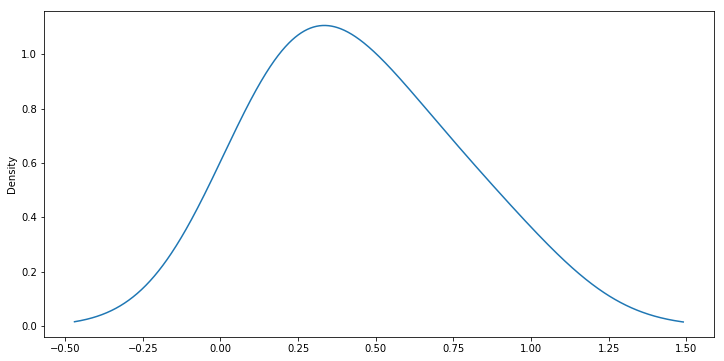

In [47]:
plt.figure(figsize=(12,6))
y.plot.kde(bw_method=0.81)
print(y.mean())
print(y.std())

In [38]:
y_train_pred.reshape(-1,1)

array([[ 2.75879261e-01],
       [ 5.37851303e-01],
       [ 8.83251984e-01],
       [ 3.57310261e-01],
       [ 1.14228457e-01],
       [ 5.86426333e-01],
       [ 3.75969778e-01],
       [ 3.72764092e-01],
       [ 8.75800104e-01],
       [ 6.03127916e-01],
       [ 2.30581661e-01],
       [ 4.10579769e-01],
       [ 5.73085598e-04],
       [ 2.89434958e-01],
       [ 6.95896441e-01],
       [ 2.78749440e-01],
       [ 4.05961994e-01],
       [ 8.77497349e-01],
       [ 5.25592788e-01],
       [ 4.27271931e-01],
       [ 2.97029319e-01],
       [ 4.80713569e-01],
       [ 2.27344509e-01],
       [ 1.01378520e+00],
       [ 3.54887846e-01],
       [ 7.11239473e-02],
       [ 4.35513173e-01],
       [ 5.15605536e-01],
       [ 1.07040859e-01],
       [ 7.96427080e-01],
       [ 6.74178183e-01],
       [ 1.68646105e-01],
       [ 2.53183142e-01],
       [ 1.06952462e-01],
       [ 8.98225951e-01],
       [-3.51729544e-02],
       [ 1.89434710e-01],
       [ 6.74061133e-01],
       [ 5.8

In [207]:
mean_squared_error(y_train_pred.reshape(-1,1),  y_train)




0.14569121338912133

In [208]:
# examine the coefficients
print(linreg.coef_)


# make predictions on the training set
# ILLUSTRATION PURPOSE ONLY
y_train_pred = linreg.predict(X_train)

[-3.66188167e+00  6.98124465e-01 -2.61955467e-01 -2.85270027e-01
 -1.64740837e-01  2.46972333e-01 -1.09290051e+00 -5.96857796e-01
  1.11200239e+00 -7.21968931e-01  4.27346598e+00 -2.28040268e-01
  8.04875769e-01 -2.57934732e-01 -2.63458023e-01 -1.04616958e+00
  6.07784197e-01  7.73552561e-01  5.96468029e-02  6.90215922e-01
  2.16759430e-02 -4.87802949e-01 -5.18858404e-01  1.39478815e-01
 -1.24417942e-01  3.15003821e-01 -1.52633736e-01 -9.65003927e-01
  1.17142163e+00 -3.08546690e-02 -9.29085548e-01  1.24654586e-01
  1.98104506e-01  7.30804821e-01 -1.77337294e-01  8.32927588e-02
  3.46045601e-01  5.01837338e-01  1.57062958e+00 -4.13478807e-01
  1.39350802e+00 -3.49428114e+00  7.09577818e-01 -8.32141352e-01
 -1.39984927e+00  1.02482840e+00  2.13855006e-01 -6.18937325e-01
  5.28954490e-01  7.98294890e-02  5.93688560e-02 -1.68582667e-01
  7.31264051e-01 -1.39635208e+00  2.38507704e-01  5.50621439e-01
 -5.61447867e-01  6.18989764e-01  2.55517024e+00 -3.71769599e+00
  7.09191935e-01  3.82041

In [209]:
# calculate RMSE

np.sqrt(mean_squared_error(y_train_pred.reshape(-1,1),  y_train))

0.1459018637259146

In [210]:

y_test_pred = linreg.predict(X_test)
np.sqrt(mean_squared_error(y_test_pred.reshape(-1,1),  y_test))

0.15321896777219

### Using a Decision Tree Regressor

- A powerful (relatively speaking) model, which is ideal for finding complex, non-linear relationships in the data


In [211]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [212]:
from sklearn import tree
dot_data = tree.export_graphviz(tree_reg, out_file=None)
# you may need to install this graphviz
# conda install pip && pip install graphviz
import graphviz
graph = graphviz.Source(dot_data)
graph.render("/Users/mahdi/Desktop/regressor") 

'/Users/mahdi/Desktop/regressor.pdf'

In [213]:
y_train_pred = tree_reg.predict(X_train)

print(y_train_pred[0:10])
print(y_train.tolist()[0:10])


[1.   0.23 0.75 0.18 0.75 0.39 0.21 0.55 0.18 1.  ]
[1.0, 0.23, 0.75, 0.18, 0.75, 0.39, 0.21, 0.55, 0.18, 1.0]


In [82]:
np.round(np.sqrt(mean_squared_error(y_train_pred.reshape(-1,1),  y_train)), 2)

0.0

### OVERFITTING and RMSE

* Despite the fact that RMSE=0, it is very unlikely that the model is perfect
* The RMSE of 0 is due to the model overfitting the training data
  * The model "Remembers" the data perfectly and predicts observation as it saw them
  
* You will remember that models that overfit the data tend to have poor generalizaiton power
  * Computing the RMSE on the test data shows that them model is overfitting


In [83]:
y_test_pred = tree_reg.predict(X_test)

np.round(np.sqrt(mean_squared_error(y_test_pred.reshape(-1,1),  y_test)), 2)

0.21

### OVERFITTING and RMSE - Cont'd

<img src="images/overfitting.png" alt="drawing" style="width:1000px;"/>






### Assessing a Model's Generalization Power

* As discussed earlier, the best statistical learning methods is used based on it's  results in a low test error

  * You cannot use the test set for minimizing overfit since the model will learn to fit the test set.
  * You are specifically selecting the model that does best on the test data 
  
* The Decisin tree is a complex model:
  * Has a plethora or a param that can impact the RMSE
  * The test error rate can be highly variable, depending which observations are in which set (train and test)

* How do we test the performance of different params, overfitting while mitigating variance across different runs

In [206]:

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X_train, y_train)
y_test_pred = tree_reg.predict(X_test)
np.round(np.sqrt(mean_squared_error(y_test_pred.reshape(-1,1),  y_test)), 2)

0.17

(array([  6.,  39.,  84., 132., 114.,  68.,  36.,  18.,   1.,   2.]),
 array([0.16 , 0.169, 0.178, 0.187, 0.196, 0.205, 0.214, 0.223, 0.232,
        0.241, 0.25 ]),
 <a list of 10 Patch objects>)

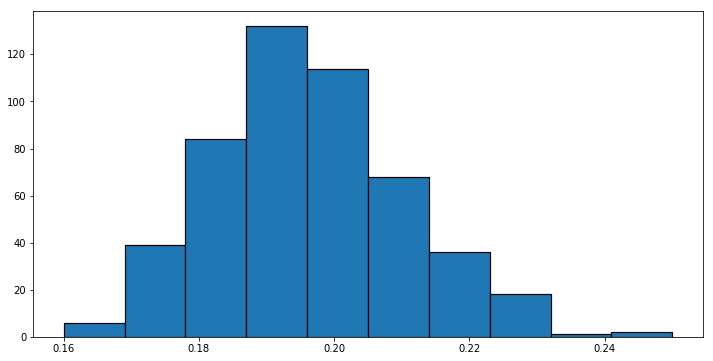

In [113]:
rmse = []
for i in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    tree_reg = DecisionTreeRegressor(max_depth=3)
    tree_reg.fit(X_train, y_train)
    y_test_pred = tree_reg.predict(X_test)
    rmse.append(np.round(np.sqrt(mean_squared_error(y_test_pred.reshape(-1,1),  y_test)), 2))

plt.figure(figsize=(12,6))
plt.hist(rmse, edgecolor='black', linewidth=1.2)

### Assessing a Model's Generalization Power - Cont'd

* You don't want to use the test data until you have completed all your tests on parameterizing the model

  * You cannot use the test set for minimizing overfit since the model will learn to fit the test set.



* To explore which models are best for the decision tree regressor, we can split the training set into:

  * A smaller training set: used to train the model
  
  * validation set: after the training (before the testing) to minimize overfitting 



### The Train / Validation / Test  Approach

* Train the decision tree regressor on the new, smaller training set



* Explore different parameters if needed 
  * choose those perform best on the validation set
  
  
* Only use the test set to compare the decision tree regressor against other models
  * Choose the model with the smallest generalization error



### Shortcomings of the Train / Validation / Test  Approach


* Since statistical methods tend to perform worse when trained to learn complex model using fewer observations
  * Less data to learn the model 
  * Validation set error rate may tend to overestimate the test error rate


* Wastes another chunk of data (validation set), which cannot be used in training

* A good alternative to the training/validation/test is a method called K-fold cross-validation

<img src="images/cross_validation.png" alt="drawing" style="width:800px;"/>



### $K$-Fold Cross Validation

* Cross-validation is applied on the training set


* We use the following algorithm to train/validate using $K$-fold cross-validation
  * The training set is split into $K$ complementary chunks of data
  * We consider $K-1$ chunk as training and 1 chunk as testing
  * We repeat the training/testing k-times and average the estimates (ex. RMSE) into a single cross-validation estimate

* Once we find the best model params, we then use them to train on the full training set

* It's common to use $K=10$ for cross-validation

In [30]:
from sklearn.model_selection import cross_val_score

In [118]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                        scoring='neg_mean_squared_error', cv=10, )

tree_reg_rmse = np.sqrt(np.mean(-scores))

tree_reg_rmse

0.185395619248039

### Scoring the $K$ Data Chunks

* for scoring the $k$ subsets, we used a function called "neg_mean_squared_error". This is simply:

$$ 
-1 \times MSE
$$

* The reason for this is that `cross_val_score` requires similarity function ( as opposed to a distance function).
 * In MSE, the lower the score the better
 * In cross_val_score scoring scheme, the greater the score, the better the model

See link below for available scoring functions for regression:
http://scikit-learn.org/stable/modules/model_evaluation.html

### Random Forest Regressor

* Random Forests works by training many Decision Tree Regressors on random subsets of the features
  * Averaging out the predictions

* In general, the class of models wich work by averaging outcomes of a set of other models is called ensemble methods   * Subsert of of ensembl machine learning


In [190]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=50, max_depth=3, max_features=10)



### Radnom Forest Parameters


* The number of n_estimators in the  RandomForestRegressor defines the number of trees in the ensemble (forest)

* `max_features` is the maximum number of features to consider when looking for the best split


* The RandomForest Model yields a slightly lower error value than both the DecisionTreeRegressor and the LinearRegression models


In [191]:
scores = cross_val_score(forest_reg, X_train, y_train,
                        scoring='neg_mean_squared_error', cv=10)
forest_reg_rmse = np.sqrt(-scores)
forest_reg_rmse

array([0.18216631, 0.16844488, 0.19571895, 0.13454032, 0.15075147,
       0.17043042, 0.17441722, 0.1940984 , 0.19984094, 0.18913779])

In [192]:
print ("score are %s\n" % forest_reg_rmse)
print ("mean score is %s"  % np.mean(forest_reg_rmse))


score are [0.18216631 0.16844488 0.19571895 0.13454032 0.15075147 0.17043042
 0.17441722 0.1940984  0.19984094 0.18913779]

mean score is 0.17595467047035943


### Using Grid Search For Finding Params That Minimize Loss

- Scikit-Learn offers GridSearchCV (Grid Search Cross-Validation)
  - Takes a list of parameters and some values and exhaustively tries the values using cross-validation


In [194]:
from sklearn.model_selection import GridSearchCV

grid_search_params = [{'n_estimators':[3, 9, 27, 50, 81], 'max_features': [2, 3, 4, 5, 7, 9, 11]}]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, 
                           param_grid=grid_search_params, 
                           cv=10, 
                           scoring = 'neg_mean_squared_error'
                          )

* The above search cases represent 35 different combination for `n_estimators` and `max_features`

 * Each of the tests is carried out using cros-validation with k=10

In [195]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 9, 27, 50, 81], 'max_features': [2, 3, 4, 5, 7, 9, 11]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [177]:
grid_search.best_params_

{'max_features': 11, 'n_estimators': 81}


- The best estimators was generated from `max_features = 3` and `n_estimators = 27`
- You can also see all the results for all the values passed

In [178]:
cv_scores = grid_search.cv_results_
for i in range(len(cv_scores['params'])):
    params, mean_score =  cv_scores['params'][i], cv_scores['mean_test_score'][i]
    print(params, np.sqrt(-mean_score))


{'max_features': 2, 'n_estimators': 3} 0.2122318364294934
{'max_features': 2, 'n_estimators': 9} 0.1911920055188689
{'max_features': 2, 'n_estimators': 27} 0.1814166511338128
{'max_features': 2, 'n_estimators': 50} 0.18354632491314377
{'max_features': 2, 'n_estimators': 81} 0.17810163005472676
{'max_features': 3, 'n_estimators': 3} 0.21898279271519566
{'max_features': 3, 'n_estimators': 9} 0.19467392979833542
{'max_features': 3, 'n_estimators': 27} 0.1804823857271383
{'max_features': 3, 'n_estimators': 50} 0.18473204794985887
{'max_features': 3, 'n_estimators': 81} 0.17441718788341606
{'max_features': 4, 'n_estimators': 3} 0.21297367695510802
{'max_features': 4, 'n_estimators': 9} 0.18668281294318606
{'max_features': 4, 'n_estimators': 27} 0.1707429845494319
{'max_features': 4, 'n_estimators': 50} 0.17344498651526463
{'max_features': 4, 'n_estimators': 81} 0.17464054675231
{'max_features': 5, 'n_estimators': 3} 0.19576276214414706
{'max_features': 5, 'n_estimators': 9} 0.18205405774699

In [46]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=27, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [196]:
# Let's predict the new values using this best estimator found uisng the grid search

training_set_predictions_rand_forest = grid_search.best_estimator_.predict(X_train)


Text(0, 0.5, 'Measured  a1')

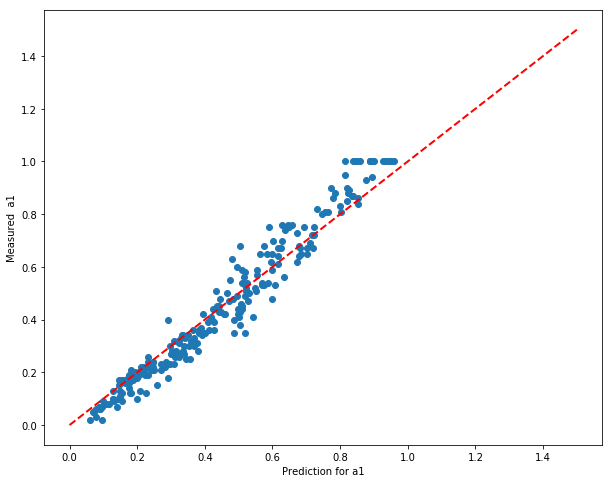

In [200]:
plt.figure(figsize=(10,8))

plt.scatter(training_set_predictions_rand_forest, y_train.values)
plt.plot(
    [0,1.5],
    [0,1.5],
    color='r', linewidth =2, linestyle = '--')

plt.xlabel("Prediction for a1")
plt.ylabel("Measured  a1")



### Testing

* Once we have tweaked all the parameters for all models, we can use the test data to compare the models' generalization performance

* The approach is the same as that followed above:
 * For each of model, we run the prediction on test data and compare the predicted with the observed values 
 * We select the model that makes the smallest error
* We determine whether the generalized performance is sufficient for our application
  - The performance requirements for a patient-facing application are perhaps not the same as those for an application for predicting algae blooms
  
* Not that in this approach, we are rewarding models that generalize well even if they are more complex 
 * We don't penalize complex models if they result is high generalization performance
 * Between models with relatively similar generalization performance, we need to choose the one with fewer parameters
